In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.metrics import accuracy_score, f1_score
from sklearn.neighbors import KNeighborsClassifier
%matplotlib inline

## K-Nearest Neighbor Classifier (Training & Validation Set are Given Separately)

### Supervised Dataset: Sign Training Set

In [2]:
train_data = pd.read_csv('https://raw.githubusercontent.com/MatthewSharpOTU/CSCI4050U_FinalProject/main/dataset/sign_mnist_train.csv', sep=',')
train_data

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27450,13,189,189,190,190,192,193,193,193,193,...,132,165,99,77,52,200,234,200,222,225
27451,23,151,154,157,158,160,161,163,164,166,...,198,198,198,198,198,196,195,195,195,194
27452,18,174,174,174,174,174,175,175,174,173,...,121,196,209,208,206,204,203,202,200,200
27453,17,177,181,184,185,187,189,190,191,191,...,119,56,27,58,102,79,47,64,87,93


### Supervised Dataset: Sign Validation Set

In [4]:
val_data = pd.read_csv('https://raw.githubusercontent.com/MatthewSharpOTU/CSCI4050U_FinalProject/main/dataset/sign_mnist_test.csv', sep=',')
val_data

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,6,149,149,150,150,150,151,151,150,151,...,138,148,127,89,82,96,106,112,120,107
1,5,126,128,131,132,133,134,135,135,136,...,47,104,194,183,186,184,184,184,182,180
2,10,85,88,92,96,105,123,135,143,147,...,68,166,242,227,230,227,226,225,224,222
3,0,203,205,207,206,207,209,210,209,210,...,154,248,247,248,253,236,230,240,253,255
4,3,188,191,193,195,199,201,202,203,203,...,26,40,64,48,29,46,49,46,46,53
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7167,1,135,119,108,102,105,99,61,103,121,...,108,112,116,114,118,180,184,176,167,163
7168,12,157,159,161,164,166,166,171,174,175,...,213,213,213,214,213,211,210,210,209,208
7169,2,190,191,190,191,190,190,192,192,191,...,216,215,213,214,214,213,210,211,209,208
7170,4,201,205,208,209,214,216,218,223,226,...,112,169,255,255,237,113,91,67,70,63


### Model Selection (Select Best K with Accuracy & F-measure Score)

#### Split Data Set

In [4]:
# Split Data Set (Src & Target)
X_train = train_data.drop(['label'], axis=1)
Y_train = train_data['label']
X_val = val_data.drop(['label'], axis=1)
Y_val = val_data['label']

#### K-NN Classifier

In [6]:
num_neighbors = [1, 5, 10, 15, 20, 25, 30]
trainAcc = np.zeros(len(num_neighbors))
valAcc = np.zeros(len(num_neighbors))
trainF1 = np.zeros(len(num_neighbors))
valF1 = np.zeros(len(num_neighbors))

for i in range(len(num_neighbors)):
  clf = KNeighborsClassifier(n_neighbors=num_neighbors[i], metric='minkowski', p=2)
  clf.fit(X_train.values, Y_train.values)
  Y_predTrain = clf.predict(X_train.values)
  Y_predVal = clf.predict(X_val.values)
  trainAcc[i] = accuracy_score(Y_train, Y_predTrain)
  valAcc[i] = accuracy_score(Y_val, Y_predVal)
  trainF1[i] = f1_score(Y_train, Y_predTrain, average='weighted')
  valF1[i] = f1_score(Y_val, Y_predVal, average='weighted')

/home/marco_ma/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/marco_ma/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/home/marco_ma/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/marco_ma/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_

#### Training & Validation Accuracy

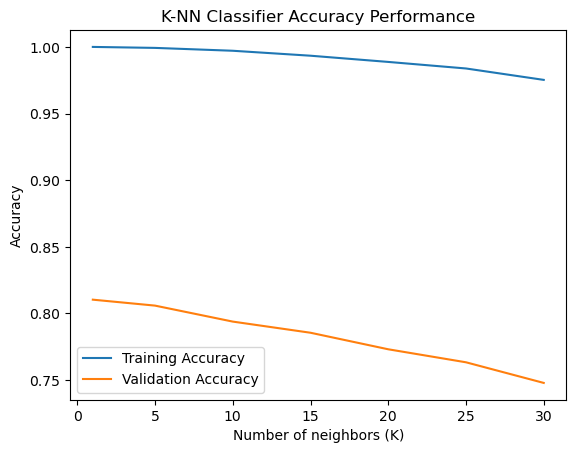

In [7]:
plt.plot(num_neighbors, trainAcc, label='Training Accuracy')
plt.plot(num_neighbors, valAcc, label='Validation Accuracy')
plt.title('K-NN Classifier Accuracy Performance')
plt.xlabel('Number of neighbors (K)')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

#### Training & Validation F-Measure Score

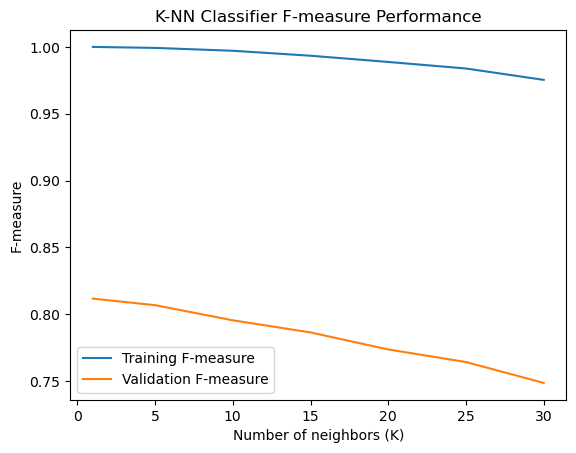

In [8]:
plt.plot(num_neighbors, trainF1, label='Training F-measure')
plt.plot(num_neighbors, valF1, label='Validation F-measure')
plt.title('K-NN Classifier F-measure Performance')
plt.xlabel('Number of neighbors (K)')
plt.ylabel('F-measure')
plt.legend()
plt.show()

#### From above, we can see that the best K (Number of Neighbors) is 1